In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
df = pd.read_csv("D:\\datascience math\\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.dropna()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


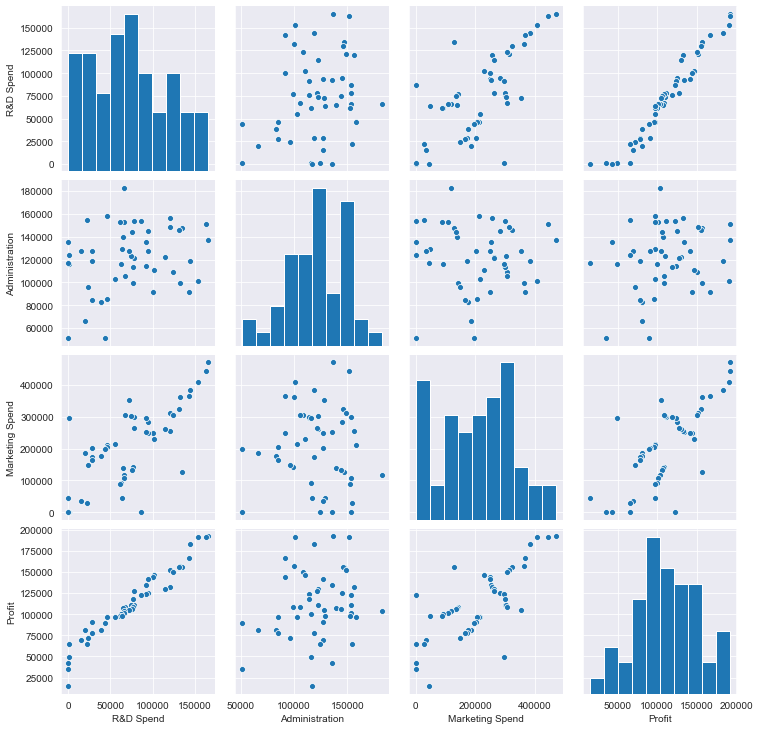

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [10]:
df1 = df.rename({'R&D Spend': 'RD_Spend','Marketing Spend' : 'Marketing_Spend'},axis = 1)
df1

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [13]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+Marketing_Spend+RD_Spend',data=df1).fit()

In [14]:
model.params

Intercept          50122.192990
Administration        -0.026816
Marketing_Spend        0.027228
RD_Spend               0.805715
dtype: float64

In [15]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
Administration     -0.525507
Marketing_Spend     1.655077
RD_Spend           17.846374
dtype: float64 
 Intercept          1.057379e-09
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
RD_Spend           2.634968e-22
dtype: float64


In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [24]:
ml_v=smf.ols('Profit~RD_Spend',data = df1).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


In [23]:
mn_v =smf.ols('Profit~Marketing_Spend',data=df1).fit()
mn_v.tvalues
mn_v.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [22]:
mn_v =smf.ols('Profit~Administration',data=df1).fit()
mn_v.tvalues
mn_v.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [25]:
#VIF
rsq_Profit = smf.ols('Profit~Administration+Marketing_Spend+RD_Spend',data=df1).fit().rsquared  
vif_Profit = 1/(1-rsq_Profit) 

rsq_Administration = smf.ols('Administration~Profit+Marketing_Spend+RD_Spend',data=df1).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_RD_Spend = smf.ols('RD_Spend~Administration+Profit+Marketing_Spend',data=df1).fit().rsquared  
vif_RD_Spend = 1/(1-rsq_RD_Spend) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend~Profit+RD_Spend+Administration',data=df1).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend)


# Storing vif values in a data frame
d1 = {'Variables':['','','',''],'VIF':[vif_Profit,vif_Administration,vif_RD_Spend,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,,20.302917
1,,1.182146
2,,19.563001
3,,2.465332


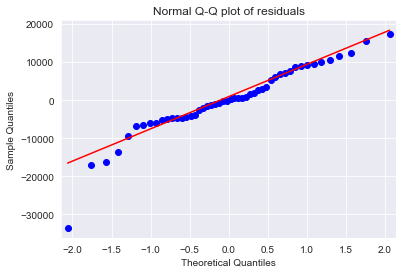

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

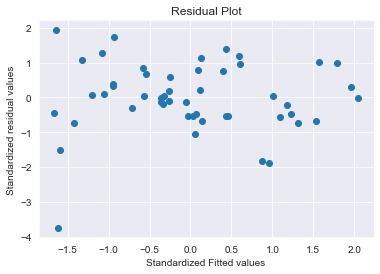

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

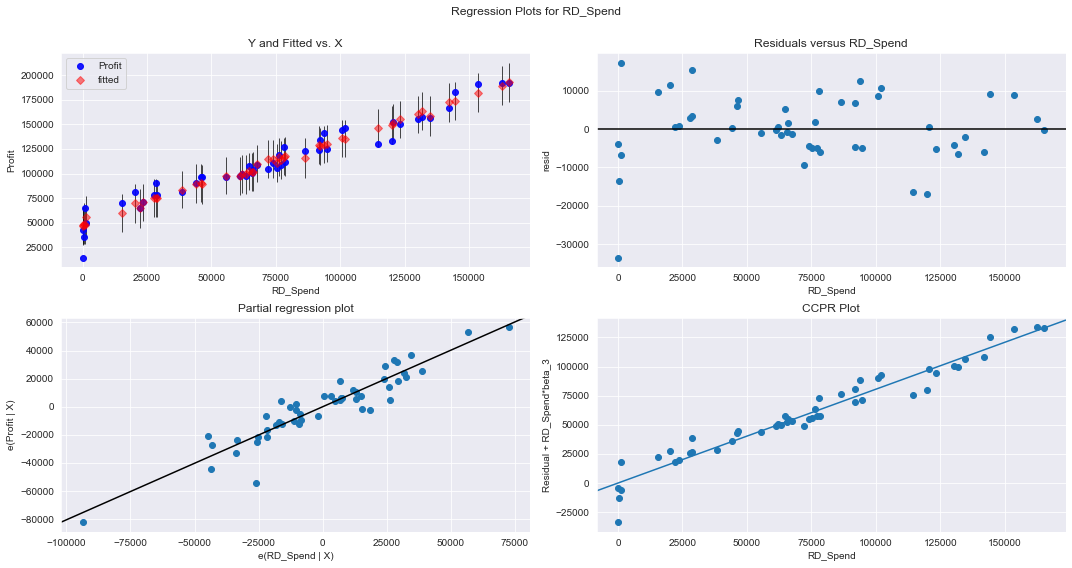

In [32]:
#residual vs regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

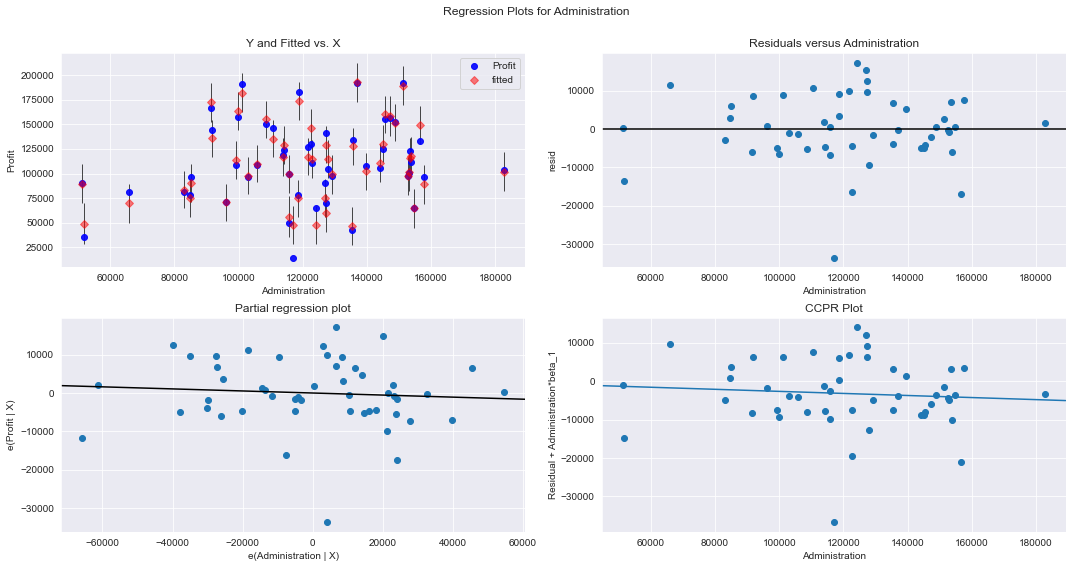

In [33]:
#residual vs regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

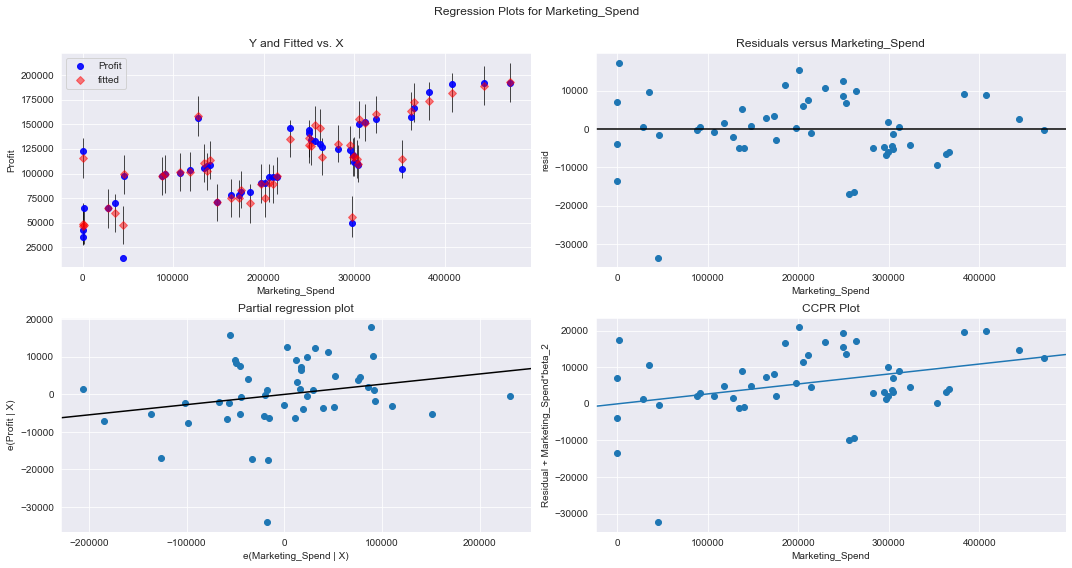

In [34]:
#residual vs regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

In [38]:
#residual vs regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "profit", fig=fig)
plt.show()

ValueError: 'Profit' is not in list

<Figure size 1080x576 with 0 Axes>

In [39]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-41-426dfec30a2f>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df)), np.round(c, 3))


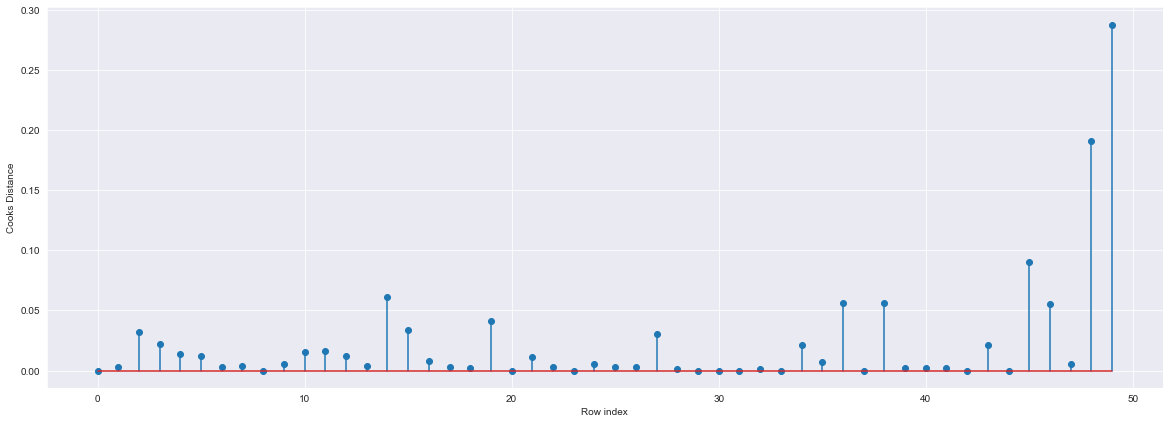

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

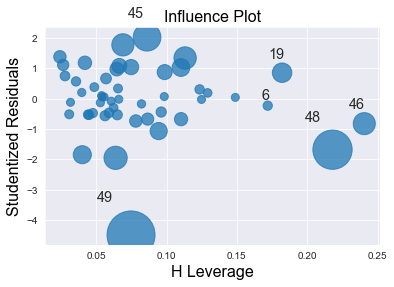

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
#49,45,48
df[df.index.isin([49,45,48])]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [45]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [1]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df21=df.drop(df.index[[48,49]],axis=0).reset_index()

NameError: name 'df' is not defined

In [53]:
#Drop the original index
df21

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [55]:
df21 = df21.drop(['index'],axis=1)

In [56]:
df21

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<ipython-input-59-f43080965cfc>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df21)), np.round(c, 3))


ValueError: x and y must have same first dimension, but have shapes (47,) and (50,)

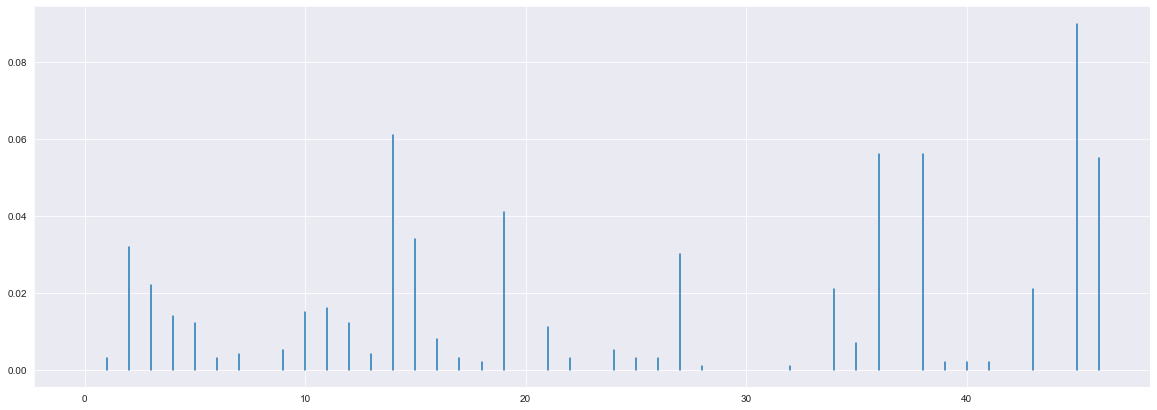

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df21)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
rd=startup1.iloc[:,0]
ms=startup1.iloc[:,2]
final_ml_d = smf.ols('Profit~rd+Administration+ms',data=startup1).fit()
(final_ml_d.rsquared,final_ml_d.aic)
final_ml_d = smf.ols('Profit~rd+Administration',data=startup1).fit()
(final_ml_d.rsquared,final_ml_d.aic)
final_ml_d = smf.ols('Profit~rd+ms',data=startup1).fit()
  (final_ml_d.rsquared,final_ml_d.aic)